In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')

df.head()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [20]:
# Vérifier les informations générales
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [21]:
# Convertir la colonne Date en format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [22]:
# Supprimer les lignes avec des valeurs manquantes dans des colonnes critiques
df = df.dropna(subset=['Date', 'Fatalities'])

In [ ]:
# Remplacer les valeurs manquantes dans certaines colonnes non critiques
df.fillna({'Location': 'Unknown', 'Operator': 'Unknown', 'Time': 'Unknown',}, inplace=True)

In [24]:
# Vérifier les valeurs manquantes après nettoyage
print(df.isnull().sum())

Date                        0
Time                     1504
Location                    0
Operator                    0
Flight #                 3661
Route                     770
AC Type                    13
Registration              271
cn/ln                     660
Aboard                     10
Aboard Passangers         221
Aboard Crew               218
Fatalities                  0
Fatalities Passangers     234
Fatalities Crew           233
Ground                     34
Summary                    60
dtype: int64


In [26]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print(missing_percent)


Date                      0.000000
Time                     30.140281
Location                  0.000000
Operator                  0.000000
Flight #                 73.366733
Route                    15.430862
AC Type                   0.260521
Registration              5.430862
cn/ln                    13.226453
Aboard                    0.200401
Aboard Passangers         4.428858
Aboard Crew               4.368737
Fatalities                0.000000
Fatalities Passangers     4.689379
Fatalities Crew           4.669339
Ground                    0.681363
Summary                   1.202405
dtype: float64


In [37]:


df['Aboard'].fillna(df['Aboard'].median(), inplace=True)
df['Aboard Passangers'].fillna(df['Aboard Passangers'].median(), inplace=True)
df['Aboard Crew'].fillna(df['Aboard Crew'].median(), inplace=True)


C:\Users\Amin\AppData\Local\Temp\ipykernel_11184\3411644592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aboard'].fillna(df['Aboard'].median(), inplace=True)
C:\Users\Amin\AppData\Local\Temp\ipykernel_11184\3411644592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [33]:
df['AC Type'].fillna('Unknown', inplace=True)
df['Registration'].fillna('Unknown', inplace=True)


C:\Users\Amin\AppData\Local\Temp\ipykernel_11184\159238918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AC Type'].fillna('Unknown', inplace=True)
C:\Users\Amin\AppData\Local\Temp\ipykernel_11184\159238918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [34]:
df['Time'].fillna('Unknown', inplace=True)


C:\Users\Amin\AppData\Local\Temp\ipykernel_11184\1124745615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna('Unknown', inplace=True)


In [45]:

print(df.isnull().sum())

Date                       0
Time                       0
Location                   4
Operator                  10
Route                    777
AC Type                    0
Registration               0
cn/ln                    668
Aboard                     0
Aboard Passangers          0
Aboard Crew                0
Fatalities                 0
Fatalities Passangers      0
Fatalities Crew            0
Ground                     0
Summary                   64
dtype: int64


In [ ]:

print(df.describe())  # Statistiques de base

            Aboard  Aboard Passangers  Aboard Crew   Fatalities  \
count  4998.000000        4998.000000  4998.000000  4998.000000   
mean     31.141257          26.321329     4.457583    22.355342   
std      45.461818          43.203147     3.405622    35.036614   
min       0.000000           0.000000     0.000000     0.000000   
25%       7.000000           3.000000     2.000000     4.000000   
50%      16.000000          12.000000     4.000000    11.000000   
75%      35.000000          29.000000     5.000000    25.000000   
max     644.000000         614.000000    61.000000   583.000000   

       Fatalities Passangers  Fatalities Crew       Ground  
count            4998.000000      4998.000000  4998.000000  
mean               18.518607         3.550620     1.704682  
std                33.393452         3.093069    55.306594  
min                 0.000000         0.000000     0.000000  
25%                 1.000000         2.000000     0.000000  
50%                 8.000000  

In [49]:

df['Year'] = pd.to_datetime(df['Date']).dt.year
crashes_per_year = df['Year'].value_counts().sort_index()

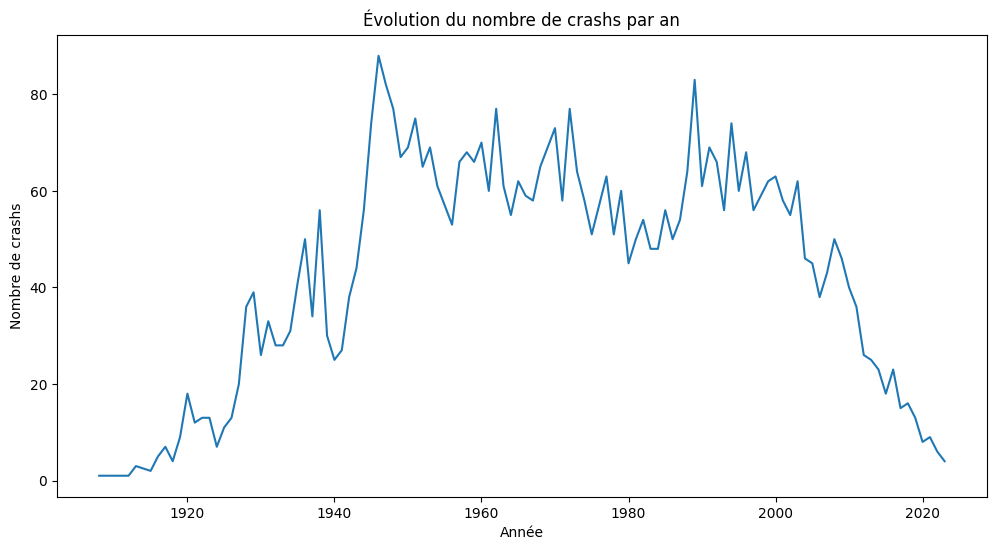

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title("Évolution du nombre de crashs par an")
plt.xlabel("Année")
plt.ylabel("Nombre de crashs")
plt.show()

In [51]:
print("Moyenne des décès:", df["Fatalities"].mean())
print("Médiane des décès:", df["Fatalities"].median())
print("Écart-type des décès:", df["Fatalities"].std())

Moyenne des décès: 22.35534213685474
Médiane des décès: 11.0
Écart-type des décès: 35.036614006859004


In [52]:
df_1950_1980 = df[(df["Year"] >= 1950) & (df["Year"] <= 1980)]["Fatalities"]
df_1981_2023 = df[(df["Year"] > 1980)]["Fatalities"]

In [54]:
t_stat, p_value = stats.ttest_ind(df_1950_1980.dropna(), df_1981_2023.dropna())
print(f"Test T: Statistique_1950_1980={t_stat:.2f}, test_1981_2023={p_value:.5f}")


Test T: Statistique_1950_1980=-0.13, test_1981_2023=0.89548


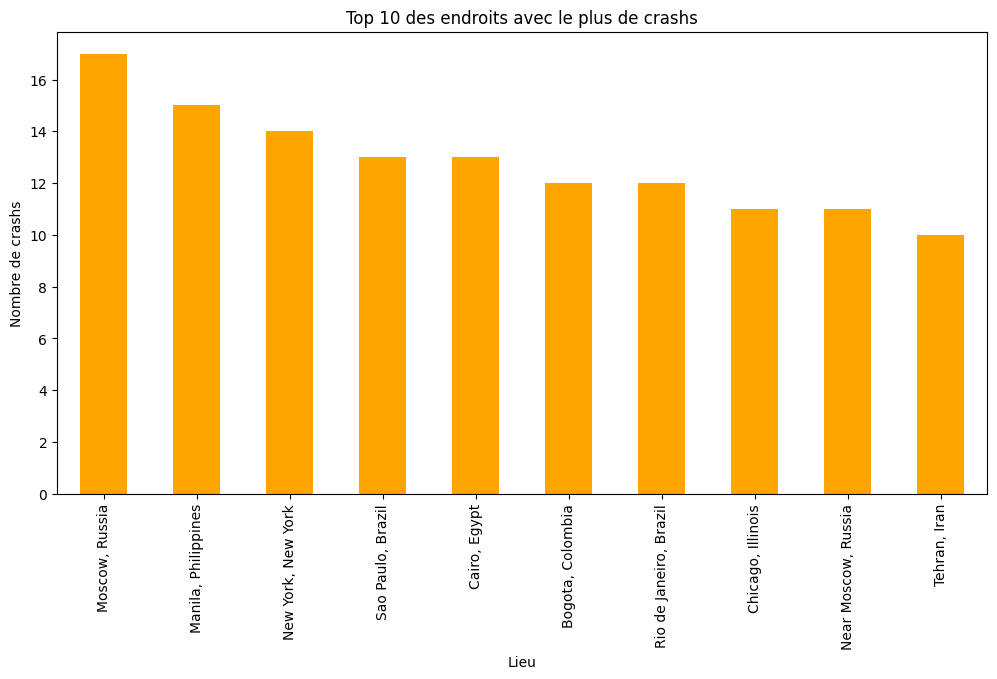

In [55]:
plt.figure(figsize=(12, 6))
df['Location'].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title("Top 10 des endroits avec le plus de crashs")
plt.xlabel("Lieu")
plt.ylabel("Nombre de crashs")
plt.show()

In [ ]:
# - Le nombre de crashs a tendance à diminuer avec le temps.
# - La moyenne des décès par crash est élevée, mais la médiane est plus faible, indiquant que certains accidents extrêmes faussent la moyenne.
# - Les crashs étaient plus fréquents entre 1950 et 1980, mais le taux de survie a augmenté après 1980.